# Objective rates - example of simple shear

In [1]:
%matplotlib inline

import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from simcoon import simmit as sim
import scipy.linalg as la
import os
dir = os.path.dirname(os.path.realpath('__file__'))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In thermoelastic isotropic materials three parameters are required: 
      
1. The Young modulus $E$,
2. The Poisson ratio $\nu$,
3. The coefficient of thermal expansion $\alpha$.

The elastic stiffness tensor and the thermal expansion coefficients tensor are written in the Voigt notation formalism as

$$\boldsymbol{L}=\left(\begin{matrix} L_{1111} & L_{1122} & L_{1122} & 0 & 0 & 0 \\ L_{1122} & L_{1111} & L_{1122} & 0 & 0 & 0 \\ L_{1122} & L_{1122} & L_{1111} & 0 & 0 & 0 \\ 0 & 0 & 0 & L_{1212} & 0 & 0 \\ 0 & 0 & 0 & 0 & L_{1212} & 0 \\ 0 & 0 & 0 & 0 & 0 & L_{1212} \end{matrix}\right), \quad \boldsymbol{\alpha}=\left(\begin{matrix} \alpha & 0 & 0 \\ 0 & \alpha & 0 \\ 0 & 0 & \alpha \end{matrix}\right),$$

with 
$$L_{1111}=\frac{E(1-\nu)}{(1+\nu)(1-2\nu)}, \quad L_{1122}=\frac{E\nu}{(1+\nu)(1-2\nu)}, \quad L_{1212}=\frac{E}{2(1+\nu)}.$$

Details on the the elastic stiffness tensor of isotropic media can be found in Lai et al 2010. The tangent stiffness tensor in this case is $\boldsymbol{L}^t=\boldsymbol{L}$. Moreover, the increment of the elastic strain is given by

$$\Delta\varepsilon^{\textrm{el}}_{ij}=\Delta\varepsilon^{\textrm{tot}}_{ij}-\alpha\Delta T\delta_{ij},$$

where $\delta_{ij}$ implies the Kronecker delta operator. In the 1D case only one component of stress is computed, through the relation 

$$\sigma^{\textrm{fin}}_{11}=\sigma^{\textrm{init}}_{11}+E\Delta\varepsilon^{\textrm{el}}_{11}.$$

In the plane stress case only three components of stress are computed, through the relations 

$$\left(\begin{matrix} \sigma^{\textrm{fin}}_{11} \\ \sigma^{\textrm{fin}}_{22} \\ \sigma^{\textrm{fin}}_{12} \end{matrix}\right) =\left(\begin{matrix} \sigma^{\textrm{init}}_{11} \\ \sigma^{\textrm{init}}_{22} \\ \sigma^{\textrm{init}}_{12} \end{matrix}\right)+\frac{E}{1-\nu^2} \left(\begin{matrix} 1 & \nu & 0 \\ \nu & 1 & 0 \\ 0 & 0 & \frac{1-\nu}{2} \end{matrix}\right) \left(\begin{matrix} \Delta\varepsilon^{\textrm{el}}_{11} \\ \Delta\varepsilon^{\textrm{el}}_{22} \\ 2\Delta\varepsilon^{\textrm{el}}_{12} \end{matrix}\right).$$

In the generalized plane strain/3D analysis case the stress tensor is computed through the relation
$$\sigma^{\textrm{fin}}_{ij}=\sigma^{\textrm{init}}_{ij}+L_{ijkl}~\Delta\varepsilon^{\textrm{el}}_{kl}.$$

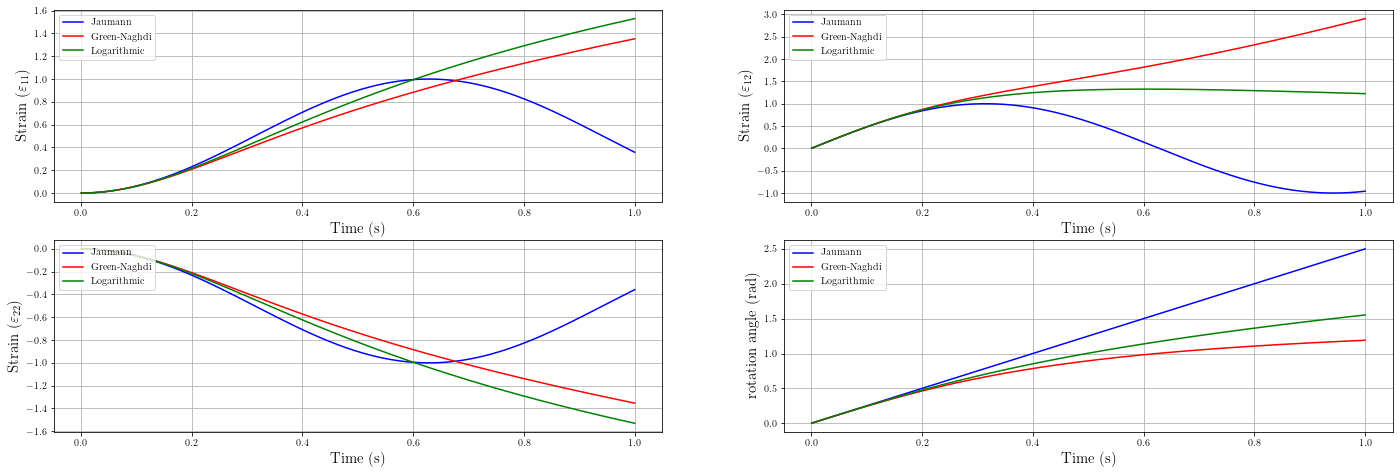

In [2]:
umat_name = 'ELISO' #This is the 5 character code for the elastic-isotropic subroutine
nstatev = 1 #The number of scalar variables required, only the initial temperature is stored here

pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure 

E = 70000.
nu = 0.3
alpha = 1.E-5

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.
solver_type = 0

props = np.array([E, nu, alpha])

path_data = 'data'
path_results = 'results'
pathfile = 'path.txt'

colors = ['blue', 'red', 'green', 'black']
rate = ['Jaumann', 'Green-Naghdi', 'Logarithmic']
fig = plt.figure()

for i in range(0,3):
    corate_type = i
    outputfile = 'results_ELISO_' + str(i) + '.txt'

    sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, solver_type, corate_type, path_data, path_results, pathfile, outputfile)

ax = fig.add_subplot(3, 2, 1)     
plt.grid(True)
for i in range(0,3):    
    
    outputfile_macro = dir + '/' + path_results + '/results_ELISO_' + str(i) + '_global-0.txt'

    e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_macro, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
    time, T, Q, r = np.loadtxt(outputfile_macro, usecols=(4,5,6,7), unpack=True)
    Wm, Wm_r, Wm_ir, Wm_d = np.loadtxt(outputfile_macro, usecols=(29,30,31,32), unpack=True)
    plt.plot(time, e11, c=colors[i], label=rate[i])

plt.xlabel(r'Time (s)', size = 15)    
plt.ylabel(r'Strain ($\varepsilon_{11}$)', size = 15)
plt.legend(loc=2)

    
ax = fig.add_subplot(3, 2, 2)        
plt.grid(True)
for i in range(0,3):    
    
    outputfile_macro = dir + '/' + path_results + '/results_ELISO_' + str(i) + '_global-0.txt'

    e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_macro, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
    time, T, Q, r = np.loadtxt(outputfile_macro, usecols=(4,5,6,7), unpack=True)
    Wm, Wm_r, Wm_ir, Wm_d = np.loadtxt(outputfile_macro, usecols=(29,30,31,32), unpack=True)
    plt.plot(time, e12, c=colors[i], label=rate[i])

plt.xlabel(r'Time (s)', size = 15)    
plt.ylabel(r'Strain ($\varepsilon_{12}$)', size = 15)
plt.legend(loc=2)

ax = fig.add_subplot(3, 2, 3)        
plt.grid(True)
for i in range(0,3):    
    
    outputfile_macro = dir + '/' + path_results + '/results_ELISO_' + str(i) + '_global-0.txt'

    e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_macro, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
    time, T, Q, r = np.loadtxt(outputfile_macro, usecols=(4,5,6,7), unpack=True)   
    Wm, Wm_r, Wm_ir, Wm_d = np.loadtxt(outputfile_macro, usecols=(29,30,31,32), unpack=True)
    plt.plot(time, e22, c=colors[i], label=rate[i])

plt.xlabel(r'Time (s)', size = 15)    
plt.ylabel(r'Strain ($\varepsilon_{22}$)', size = 15)
plt.legend(loc=2)

ax = fig.add_subplot(3, 2, 4)        
plt.grid(True)
for i in range(0,3):    
    
    outputfile_macro = dir + '/' + path_results + '/results_ELISO_' + str(i) + '_global-0.txt'

    e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_macro, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
    time, T, Q, r = np.loadtxt(outputfile_macro, usecols=(4,5,6,7), unpack=True)
    r11, r12, r13, r21, r22, r23, r31, r32, r33 = np.loadtxt(outputfile_macro, usecols=(20,21,22,23,24,25,26,27,28), unpack=True)     
    Wm, Wm_r, Wm_ir, Wm_d = np.loadtxt(outputfile_macro, usecols=(29,30,31,32), unpack=True)
    r11_max = np.minimum(r11, 1.0)
    plt.plot(time, np.arccos(r11_max), c=colors[i], label=rate[i])
    
plt.xlabel(r'Time (s)', size = 15)    
plt.ylabel(r'rotation angle (rad)', size = 15)
plt.legend(loc=2)
   
#    e = np.array([[e11[-1], e12[-1]/2.0, e13[-1]/2.0], [e12[-1]/2.0, e22[-1], e13[-1]/2.0], [e13[-1]/2.0, e23[-1]/2.0, e33[-1]]])
#    e = np.array([[e11[100], e12[100]/2.0, e13[100]/2.0], [e12[100]/2.0, e22[100], e13[100]/2.0], [e13[100]/2.0, e23[100]/2.0, e33[100]]])
#    e = np.array([[e11[200], e12[200]/2.0, e13[200]/2.0], [e12[200]/2.0, e22[200], e13[200]/2.0], [e13[200]/2.0, e23[200]/2.0, e33[200]]])
#    e = np.array([[e11[300], e12[300]/2.0, e13[300]/2.0], [e12[300]/2.0, e22[300], e13[300]/2.0], [e13[300]/2.0, e23[300]/2.0, e33[300]]])
#    e = np.array([[e11[400], e12[400]/2.0, e13[400]/2.0], [e12[400]/2.0, e22[400], e13[400]/2.0], [e13[400]/2.0, e23[400]/2.0, e33[400]]])
#   print(e)
#   V_alpha = la.eig(e)
#   ax.quiver(0, 0, V_alpha[1][0][0], V_alpha[1][0][1], color=colors[i], scale=4, width=0.01)
#   ax.quiver(0, 0, V_alpha[1][1][0], V_alpha[1][1][1], color=colors[i], scale=4, width=0.005)
              
plt.show()
